<h1 align="center"l><b>A Study of the relations of the Brain Weight to the Size of the Head </b></h1>
<p align="center">
  <img width="460" height="300" src="https://neurosciencenews.com/files/2020/08/alzheimers-late-neuroscinews-public.jpg">
</p>
<br>
<P align="center">
It is believed that there exist a relationship between head size and brain weight of human beings.
The primary objective of this notebook is to establish a relation between the same using statistical method and machine learning algorithm.
</P>



> **Dataset**: http://www.stat.ufl.edu/~winner/data/brainhead.dat 
<br>
> **Description**: http://users.stat.ufl.edu/~winner/data/brainhead.txt
<br>
> **Source:** R.J. Gladstone (1905). "A Study of the Relations of the Brain to to the Size of the Head", Biometrika, Vol. 4, pp105-123

<h1>Import necessary libraries</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

<h1>Load data</h1>

For this notebook, a CSV file formatted of the same dataset is being used.

In [2]:
#load the csv file
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
print("Length of the dataset: ", dataset.shape[0])

Length of the dataset:  237


<h1>Analyze data</h1>

In [5]:
dataset.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

The dataset doesn't have any NAN values.

In [6]:
#summary of the dataset
dataset.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


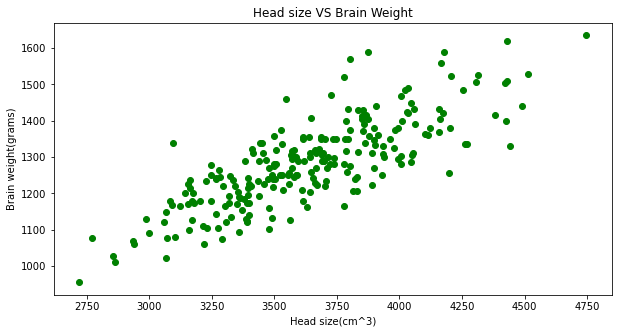

In [7]:
#plot data
plt.figure(figsize=(10,5))
plt.scatter(y='Brain Weight(grams)',x='Head Size(cm^3)',c='green',data=dataset)
plt.xlabel('Head size(cm^3)')
plt.ylabel('Brain weight(grams)')
plt.title("Head size VS Brain Weight")
plt.show()


From the scatter plot, it can be seen that brain size has a linear dependency on head size.<br>
Here, head size is considered as independent variable and brain size as the dependent variable. 

<h1>Collect X and Y values</h1>

As we are interested in finding relationship between head size and brain weight, we consider head size(independent) as X and brain size(dependent) as y.

In [8]:
X = dataset['Head Size(cm^3)'].values #input feature
y = dataset['Brain Weight(grams)'].values #target feature

Split the dataset to create test and train dataset

In [9]:
from sklearn.model_selection import train_test_split
X = X.reshape(len(X),1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
print("Length of train set: ", X_train.shape[0])
print("Length of test set: ", X_test.shape[0])

Length of train set:  189
Length of test set:  48


<h1>Implement regression model</h1>

**Linear regression** is a statistical method to define relationship between an independent variable and one or more independent variable.
<br>
<br>
For this notebook, **simple linear regression** would be used to study relationship between head size and brain weight.

It takes the following form: -
> y = β0 + β1X

1. y  is the dependent variable. 
2. X is the input feature (independent variable).
3. β0 is the intercept
4. β1 is the coefficient for x

β0 and β1 are called the model coefficients.



In [11]:
#importing sklearn linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
#model fitting
#the fit function assigns a best fit line through all the data points.
history = model.fit(X_train,y_train)

**Calculate the R-squared value:** <br>
R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
<br>
<br>
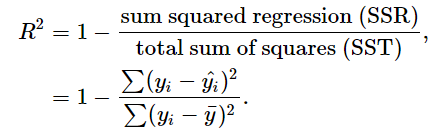
</br>
Where,
1. y(i): Actual values of y
2. y ̅ : Mean value of y
3. y^(i): Predicted values of y
        

In [13]:
print("R² Score: ", history.score(X_train,y_train))
print("Intercept: ", history.intercept_)
print("Coefficient: ", history.coef_)

R² Score:  0.6392387551180254
Intercept:  334.2612733470444
Coefficient:  [0.26106902]


**R² Score** usually ranges from **0 to 1**.
**R² Score** depends on type of data dealt with.<br>
The above model gives a R² Score of **0.639**, which is certainly not bad considering the model is trained over a very small dataset.
<br>
<br>
But we can improve the score by : -
> 1. Getting more datasets
> 2. Improving the features
> 3. Fit many models etc

<h1>Model prediction</h1>

In [14]:
#prediction on X_test
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Linear regression: Head size VS Brain weight')

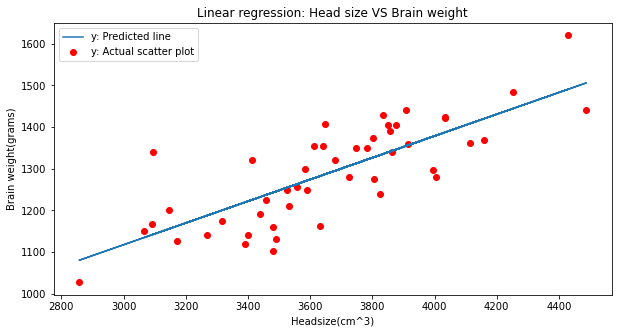

In [15]:
#plot model prediction
plt.figure(figsize=(10,5))
plt.plot(X_test,y_pred, label='y: Predicted line')   
plt.scatter(X_test,y_test,c='red',label='y: Actual scatter plot')
plt.xlabel('Headsize(cm^3)')
plt.ylabel('Brain weight(grams)')
plt.legend()
plt.title("Linear regression: Head size VS Brain weight")

The model **predicted line** against the **actual value** scattered in the graph above looks pretty good.<br>




<h1>Conclusion</h1>

From the scatterplot along with R-squared value, the relationship between head volume and brain weight <br>
appears to be **roughly linear**.<br>
It indicates that head volume is a **moderately good predictor** of brain weight.